## <center>Predicting Churn rate of the Customer</center>

The bank is seeing an unsual curn rate of customers and we need to assess and address the problem.  So from past 6 months has been collected from the bank about the random 10k customers. A number of data about the Customer has been collected during that period.  including if the customer exited or not.  

So we need to build a model to tell the bank which of the customer is at the highest risk of leaving the bank.

### Importing Libraries

In [48]:
import pandas as pd
import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
tf.__version__

'2.8.0'

### Loading the dataset

In [3]:
data = pd.read_csv('Churn_Modelling.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Checking for missing values

In [4]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

The dataset has no missing values in any of the columns

## Data preprocessing

Looking at the dataset, we can conclude that the columns 'RowNumber', 'CustomerId' and 'Surname' are not important for our predictions, so we can remove those columns.

In [5]:
#Lets drop the columns 'RowNumber', 'CustomerId' and 'Surname'

data = data.drop(['RowNumber','CustomerId','Surname'], axis=1)

In [6]:
#let's check the columns
data.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

### Encoding Categorical variables

In [7]:
#Let's check data
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
data['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [9]:
data['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [10]:
data.values[:, 2]

array(['Female', 'Female', 'Female', ..., 'Female', 'Male', 'Female'],
      dtype=object)

In [11]:
# We will encode the Gender column using label encoder
# We will encode the Geography column using Label encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])
data['Geography'] = le.fit_transform(data['Geography'])

In [12]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


## Splitting of Dataset
 * We will first split the dataset to seperate target column from independent variables
 * hen we will create train and test split

In [18]:
#let's seperate the target column from the dataset
y = data['Exited']
X = data.drop(['Exited'], axis = 1)

print('Shape of X : ', X.shape)
print('Shape of y : ', y.shape)

Shape of X :  (10000, 10)
Shape of y :  (10000,)


In [19]:
# let's perform train, test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

print('Shape of X_train : ', X_train.shape)
print('Shape of X_test : ', X_test.shape)
print('Shape of y_train : ', y_train.shape)
print('Shape of y_test : ', y_test.shape)

Shape of X_train :  (8000, 10)
Shape of X_test :  (2000, 10)
Shape of y_train :  (8000,)
Shape of y_test :  (2000,)


## Feature Scaling

Feature scaling is a method used to normalize the range of independent variables or features of data. In data processing, it is also known as data normalization and is generally performed during the data preprocessing step


In [20]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Building ANN

In [21]:
#Initializing the ANN
ann = tf.keras.models.Sequential()

In [22]:
#Adding the first input layer and the first hidden layer
ann.add(tf.keras.layers.Dense(units = 6, activation = 'relu'))

In [23]:
#Adding the secong hidden layer
ann.add(tf.keras.layers.Dense(units=6, activation= 'relu'))

In [24]:
#Adding the output layer
ann.add(tf.keras.layers.Dense(units=1, activation = 'sigmoid'))

## Training the ANN

In [26]:
#Compiling ANN
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [27]:
#Training the ANN on the training set
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
250/250 [==============================] - 4s 2ms/step - loss: 0.6217 - accuracy: 0.6888
Epoch 2/100
250/250 [==============================] - 0s 2ms/step - loss: 0.5111 - accuracy: 0.7950
Epoch 3/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4671 - accuracy: 0.7984
Epoch 4/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4488 - accuracy: 0.8021
Epoch 5/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4388 - accuracy: 0.8035
Epoch 6/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4316 - accuracy: 0.8037
Epoch 7/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4247 - accuracy: 0.8040
Epoch 8/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4174 - accuracy: 0.8086
Epoch 9/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4092 - accuracy: 0.8117
Epoch 10/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3994 - accura

## Making the predictions and evaluating the model

### Predicting the result of single observation

Use our ANN model to predict if the customer with the following informations will leave the bank: 

Geography: France

Credit Score: 600

Gender: Male

Age: 40 years old

Tenure: 3 years

Balance: \$ 60000

Number of Products: 2

Does this customer have a credit card ? Yes

Is this customer an Active Member: Yes

Estimated Salary: \$ 50000

So, should we say goodbye to that customer ?

In [29]:
data.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [36]:
prediction = ann.predict(sc.transform([[600,0,1,40,3,60000.00,2,1,1,50000.00]]))
print("Will the customer leave the bank ? ", prediction > 0.5)

Will the customer leave the bank ?  [[False]]


C:\Supriya\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [45]:
#Let's evaluate the model
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

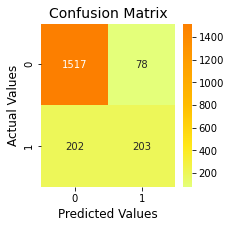

In [50]:
#Let's check the confusion matrix
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

plt.rcParams['figure.figsize'] = (3, 3)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, cmap='Wistia', fmt = '.8g')
plt.xlabel('Predicted Values',fontsize = 12)
plt.ylabel('Actual Values', fontsize = 12)
plt.title('Confusion Matrix', fontsize = 14)
plt.show()

In [51]:
# Let' check the classification report and accuracy score

print( 'Accuracy Score : ', accuracy_score(y_test, y_pred), "\n")
print('Classification Report - \n\n ', classification_report(y_test, y_pred))


Accuracy Score :  0.86 

Classification Report - 

                precision    recall  f1-score   support

           0       0.88      0.95      0.92      1595
           1       0.72      0.50      0.59       405

    accuracy                           0.86      2000
   macro avg       0.80      0.73      0.75      2000
weighted avg       0.85      0.86      0.85      2000

